In [1]:
import pandas as pd
from pandas import Series, DataFrame
import sqlite3
%matplotlib inline
from astropy.table import Table, Column
import numpy as np
from graphviz import Digraph 
import math 

In [2]:
data = pd.read_csv("spend.csv")
charge = data[data["Character Code"] == "57 - INTER DEPART CHARGES"]

In [3]:
objects = []
for obj in list(charge["Object"]): 
    if obj not in objects: 
        objects.append(obj)
clean_objects = []
for obj in objects:
    clean = obj[23:]
    clean_objects.append(clean)
clean_objects[2] = "TRAFFIC ENGINEERING"
clean_objects[11] = "INFORMATION TECHNOLOGY"
clean_objects[13] = "COMMUNITY DEVELOPMENT"
clean_objects

['ENGINEERING',
 'FLEET SERVICES',
 'TRAFFIC ENGINEERING',
 'INSURANCE',
 'PARKING',
 'FIRE',
 'LANDFILL',
 'SEWER',
 'WORKERS COMP',
 'STORMWATER',
 'STREETS',
 'INFORMATION TECHNOLOGY',
 'COM DEV BLK GNT',
 'COMMUNITY DEVELOPMENT']

In [4]:
agencies = []
for age in list(charge["Agency"]): 
    if age not in agencies: 
        agencies.append(age)
agencies
clean_agencies = []
for age in agencies: 
    clean = age[6:]
    clean_agencies.append(clean)
clean_agencies

['TRAFFIC ENGINEERING',
 'POLICE',
 'PARKS',
 'HUMAN RESOURCES',
 'STREETS',
 'ENGINEERING',
 'COMMUNITY DEVELOPMENT',
 'BUILDING INSPECTION',
 'INFORMATION TECHNOLOGY',
 'COMMON COUNCIL',
 'TREASURER',
 'MUNICIPAL COURT',
 'ATTORNEY',
 'PCED OFFICE OF DIRECTOR',
 'CLERK',
 'CIVIL RIGHTS',
 'MAYOR',
 'PLANNING',
 'ECONOMIC DEVELOPMENT',
 'ASSESSOR',
 'FINANCE',
 'LIBRARY',
 'FIRE',
 'EMPLOYEE ASSISTANCE PROGRAM',
 'TRANSPORTATION']

In [5]:
agency_spending = {}
for i in list(range(1, len(agencies))): 
    spending = {}
    for j in list(range(1, len(objects))): 
        filler = data[data["Object"] == objects[j]]
        money = sum(filler["2018"][filler["Agency"] == agencies[i]])
        if money != 0: 
            spending[clean_objects[j]] = money
    agency_spending[clean_agencies[i]] = spending
agency_spending

{'POLICE': {'FLEET SERVICES': 2407865.0100000002,
  'TRAFFIC ENGINEERING': 273847.41,
  'INSURANCE': 998518.0,
  'WORKERS COMP': 835092.0},
 'PARKS': {'FLEET SERVICES': 1885951.6,
  'TRAFFIC ENGINEERING': 29230.54,
  'INSURANCE': 176555.0,
  'WORKERS COMP': 273306.0},
 'HUMAN RESOURCES': {'INSURANCE': 34249.0, 'WORKERS COMP': 1319.0},
 'STREETS': {'FLEET SERVICES': 7331039.25,
  'TRAFFIC ENGINEERING': 33274.0,
  'INSURANCE': 115286.0,
  'WORKERS COMP': 398717.0},
 'ENGINEERING': {'FLEET SERVICES': 36484.630000000005,
  'TRAFFIC ENGINEERING': 3304.84,
  'INSURANCE': 54002.0,
  'WORKERS COMP': 102690.0},
 'COMMUNITY DEVELOPMENT': {'INSURANCE': 30487.0, 'WORKERS COMP': 8321.0},
 'BUILDING INSPECTION': {'FLEET SERVICES': 8819.71,
  'TRAFFIC ENGINEERING': 814.37,
  'INSURANCE': 8350.0,
  'WORKERS COMP': 34088.0},
 'INFORMATION TECHNOLOGY': {'FLEET SERVICES': 5720.46,
  'INSURANCE': 9519.0,
  'WORKERS COMP': 4167.0},
 'COMMON COUNCIL': {'INSURANCE': 3379.0, 'WORKERS COMP': 306.0},
 'TREASURE

In [6]:
DataFrame(agency_spending)

,POLICE,PARKS,HUMAN RESOURCES,STREETS,ENGINEERING,COMMUNITY DEVELOPMENT,BUILDING INSPECTION,INFORMATION TECHNOLOGY,COMMON COUNCIL,TREASURER,...,CIVIL RIGHTS,MAYOR,PLANNING,ECONOMIC DEVELOPMENT,ASSESSOR,FINANCE,LIBRARY,FIRE,EMPLOYEE ASSISTANCE PROGRAM,TRANSPORTATION
COMMUNITY DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLEET SERVICES,2407865.01,1885951.60,NaN,7331039.25,36484.63,NaN,8819.71,5720.46,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4119.42,2627818.02,NaN,NaN
INFORMATION TECHNOLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23940.00,NaN,NaN,NaN
INSURANCE,998518.00,176555.00,34249.0,115286.00,54002.00,30487.0,8350.00,9519.00,3379.0,769.0,...,2438.0,1995.0,4705.0,4639.0,3683.0,5175.0,78150.00,101277.00,515.0,NaN
TRAFFIC ENGINEERING,273847.41,29230.54,NaN,33274.00,3304.84,NaN,814.37,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3658.58,120575.71,NaN,NaN
WORKERS COMP,835092.00,273306.00,1319.0,398717.00,102690.00,8321.0,34088.00,4167.00,306.0,285.0,...,861.0,738.0,2982.0,1237.0,14659.0,2666.0,15403.00,859647.00,135.0,NaN


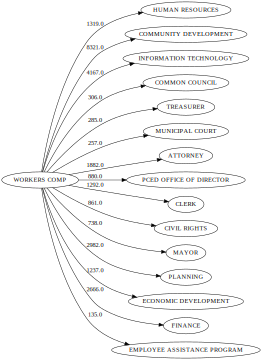

In [7]:
g = Digraph()
g.graph_attr["rankdir"] = "LR"
g.graph_attr["size"] = "5"
for age in list(agency_spending.keys()): 
    for i in list(range(1, len(agency_spending[age]))):
        if list(agency_spending[age].items())[i][0] == "WORKERS COMP":
            if agency_spending[age]["WORKERS COMP"] < 10000:
                g.edge(list(agency_spending[age].items())[i][0], age, label=str(list(agency_spending[age].items())[i][1]))
g

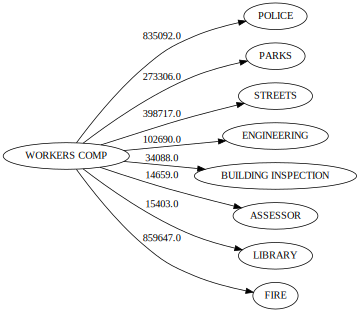

In [10]:
g = Digraph()
g.graph_attr["rankdir"] = "LR"
g.graph_attr["size"] = "5"
for age in list(agency_spending.keys()): 
    for i in list(range(1, len(agency_spending[age]))):
        if list(agency_spending[age].items())[i][0] == "WORKERS COMP":
            if agency_spending[age]["WORKERS COMP"] > 10000:
                g.edge(list(agency_spending[age].items())[i][0], age, label=str(list(agency_spending[age].items())[i][1]))
g